# 线性回归

给定一个数据点集合$X$和对应的目标值$y$，线性模型的目标就是找到一条使用向量$w$和位移$b$描述的线，来尽可能地近似每个样本$X[i]$和$y[i]$。用数学符号来表示就是：
$$\hat{y} = Xw + b$$
并最小化所有数据点上的平方误差
$$\sum_{i=1}^n (\hat{y}_i-y_i)^2.$$

接下来，我们会先手动写一个线性回归模型，然后再通过 nn 包构建一个线性回归模型。然后你自然而然地就会喜欢上用PyTorch了。

In [23]:
# 导入必要的包
import torch
from torch.autograd import Variable
import torch.nn as nn # 模型包，里面包含了各种各样的模型，方便我们直接使用
import matplotlib.pyplot as plt

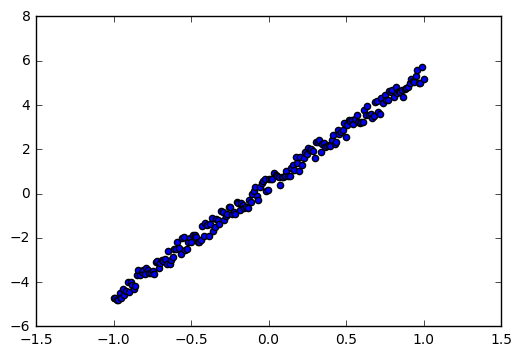

In [24]:
# 生成用来进行线性回归的模拟数据
x = torch.unsqueeze(torch.linspace(-1, 1, 200), dim = 1)
y = 5 * x + 0.8 * torch.rand(x.size())

# 绘制模拟数据的图像
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [25]:
# 为了能够自动求导，我们要将 x, y 变成 Variable 对象
X = Variable(x) # PyTorch中的 Variable 默认是允许自动求导的，所以 requires_grad=True 可以不加
Y = Variable(y) # 同上

Variable containing:
 16.4963
[torch.FloatTensor of size 1]

Variable containing:
 10.1278
[torch.FloatTensor of size 1]

Variable containing:
 10.1082
[torch.FloatTensor of size 1]

Variable containing:
 10.1081
[torch.FloatTensor of size 1]

Variable containing:
 10.1081
[torch.FloatTensor of size 1]



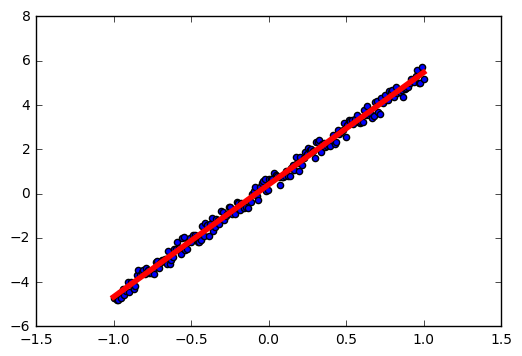

Variable containing:
 5.0680
[torch.FloatTensor of size 1x1]

Variable containing:
 0.4031
[torch.FloatTensor of size 1x1]



In [27]:
# 定义参数初始化函数
def init_parameters():
    W = Variable( torch.randn(1, 1), requires_grad=True)  # 随机初始化 w
    b = Variable( torch.zeros(1, 1), requires_grad=True )  # 初始化偏差
    parameters = {"W": W, "b": b}
    return parameters

# 定义模型
def model(X, parameters):
    return X * parameters["W"] + parameters["b"]

# 定义损失函数
def square_loss(y_hat, Y):
    loss = (y_hat - Y).pow(2).sum()
    return loss

# 使用梯度来更新参数
def update_parameters(parameters, lr):
    parameters["W"].data -= lr * parameters["W"].grad.data
    parameters["b"].data -= lr * parameters["b"].grad.data
    return

####     超参数     ####
EPOCH = 100 # 迭代次数
learning_rate = 0.001 # 学习速率

parameters = init_parameters() # 参数初始化

####     开始训练     ####
for t in range(EPOCH):
    # 对x进行预测
    y_hat = model(X, parameters)
    # 计算损失
    loss = square_loss(y_hat, Y)
    # 反向求导
    loss.backward()
    # 通过梯度，更新参数
    update_parameters(parameters, learning_rate)
    if (t+1) % 20 == 0:
        print(loss)
    # 因为自动求导会对梯度自动地积累，所以，我们要清除梯度
    parameters["W"].grad.data.zero_()
    parameters["b"].grad.data.zero_()

# 画图
plt.scatter(X.data.numpy(), Y.data.numpy())
plt.plot(X.data.numpy(), y_hat.data.numpy(), 'r-', lw = 4)
plt.show()
print(parameters["W"])
print(parameters["b"])